<a href="https://colab.research.google.com/github/Vitalyastiy/courses/blob/main/IBM/Vis_W3-Exercise-Waffle-Charts-Word-Clouds-and-Regression-Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>


# Вафельные диаграммы, облака слов и графики регрессии


Предполагаемое необходимое время: **30** минуты


## Цели

После завершения этой лабораторной работы вы сможете:

* Создавайте облако слов и вафельные диаграммы
* Создавайте регрессионные графики с помощью библиотеки Seaborn


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Exploring Datasets with *p*andas](#0)<br>
2. [Downloading and Prepping Data](#2)<br>
3. [Visualizing Data using Matplotlib](#4) <br>
4. [Waffle Charts](#6) <br>
5. [Word Clouds](#8) <br>
7. [Regression Plots](#10) <br>
</div>


# Exploring Datasets with *pandas* and Matplotlib<a id="0"></a>

Toolkits: The course heavily relies on [*pandas*](http://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01) and [*Numpy*](http://www.numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01) for data wrangling, analysis, and visualization. The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01).

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01) from United Nation's website

The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. In this lab, we will focus on the Canadian Immigration data.


# Downloading and Prepping Data <a id="2"></a>


The first thing we'll do is install **openpyxl** (formerly **xlrd**), a module that *pandas* requires to read Excel files.


In [ ]:
!mamba install openpyxl==3.0.9 -y

Import Primary Modules:


In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

Download the Canadian Immigration dataset and read it into a *pandas* dataframe.


In [2]:
df_can =pd.read_excel('https://github.com/Vitalyastiy/courses/blob/main/IBM/Canada.xlsx?raw=true',
                      sheet_name='Canada by Citizenship',
                       skiprows=range(20), #пропустить вначале 20 строк
                       skipfooter= 2 ) #пропустить 2 строки в конце датафрейма
df_can

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's take a look at the first five items in our dataset


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Let's find out how many entries there are in our dataset


In [4]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


Очистите данные. Мы внесем некоторые изменения в исходный набор данных, чтобы упростить создание наших визуализаций. Обратитесь к *Введению в Matplotlib и линейным графикам* и *Площадным графикам, гистограммам и столбчатым графикам* для получения подробного описания этой предварительной обработки.


In [5]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] =  df_can.sum (axis = 1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


<ipython-input-5-65c457ae512b>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] =  df_can.sum (axis = 1)


# Visualizing Data using Matplotlib<a id="4"></a>


Import and setup `matplotlib`:


In [6]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


# Вафельные карты <a id="6"></a>


"Вафельная диаграмма" - это интересная визуализация, которая обычно создается для отображения прогресса в достижении целей. Обычно это эффективный вариант, когда вы пытаетесь добавить интересные функции визуализации к визуальному элементу, состоящему в основном из ячеек, такому как панель мониторинга Excel.


Давайте вернемся к предыдущему тематическому исследованию о Дании, Норвегии и Швеции.


In [7]:
# let's create a new dataframe for these three countries
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


К сожалению, в отличие от R, "вафельные" диаграммы не встроены ни в одну из библиотек визуализации Python. Поэтому мы научимся создавать их с нуля.


**** Шаг 1.** Первым шагом в создании таблицы вафель является определение доли каждой категории по отношению к общему количеству.


In [8]:
# compute the proportion of each category with respect to the total
total_values = df_dsn['Total'].sum()
category_proportions = df_dsn['Total'] / total_values

# print out proportions
pd.DataFrame({"Category Proportion": category_proportions})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


**Шаг 2.** Вторым шагом является определение общего размера `вафельной` диаграммы.


In [9]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


**** Шаг 3.** Третий шаг заключается в использовании пропорции каждой категории для определения соответствующего ей количества плиток

In [10]:
# compute the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})

,Number of tiles
Country,
Denmark,129
Norway,77
Sweden,194


Исходя из рассчитанных пропорций, Дания займет 129 плиток в таблице "вафель", Норвегия займет 77 плиток, а Швеция займет 194 плитки.


**Шаг 4.** Четвертый шаг - создание матрицы, напоминающей `вафельную` диаграмму, и заполнение ее.


In [11]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1

        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

print ('Waffle chart populated!')

Waffle chart populated!


Давайте взглянем на то, как выглядит матрица.


In [12]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Как и ожидалось, матрица состоит из трех категорий, и общее количество экземпляров каждой категории соответствует общему количеству фрагментов, выделенных каждой категории.

**Шаг 5.** Преобразуйте матрицу `вафельной` диаграммы в визуальное изображение.


<Figure size 640x480 with 0 Axes>

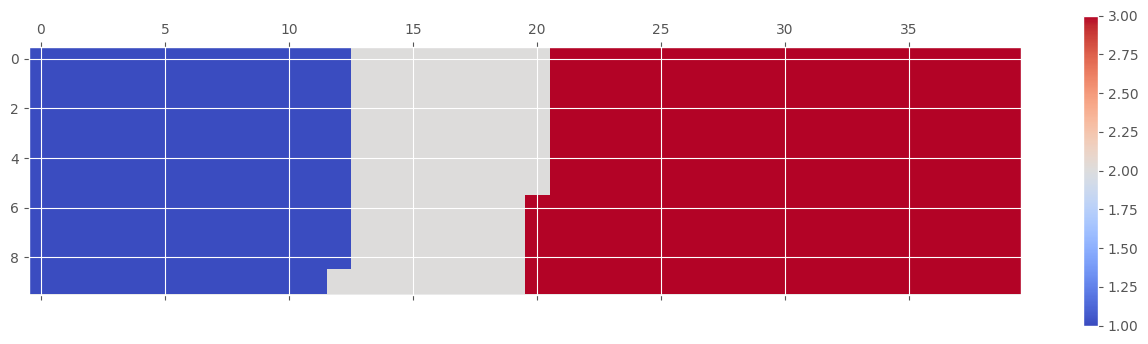

In [13]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

**Шаг 6.** Украсьте диаграмму.


<Figure size 640x480 with 0 Axes>

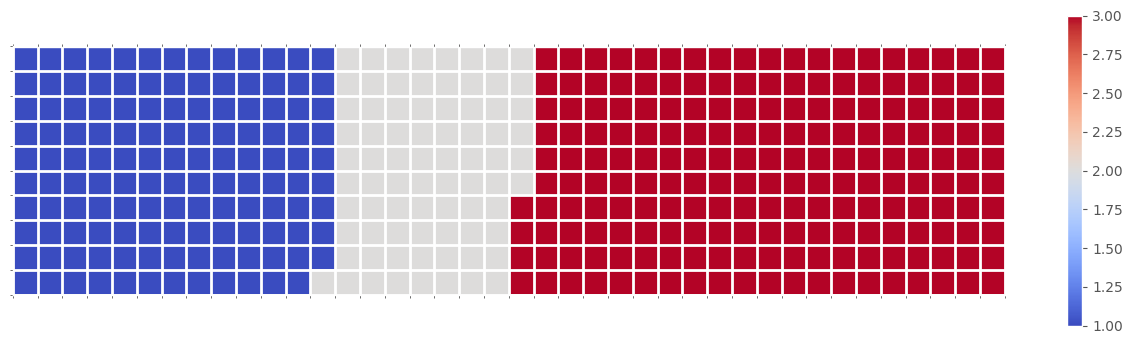

In [14]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

**Шаг 7.** Создайте легенду и добавьте ее на диаграмму.


<Figure size 640x480 with 0 Axes>

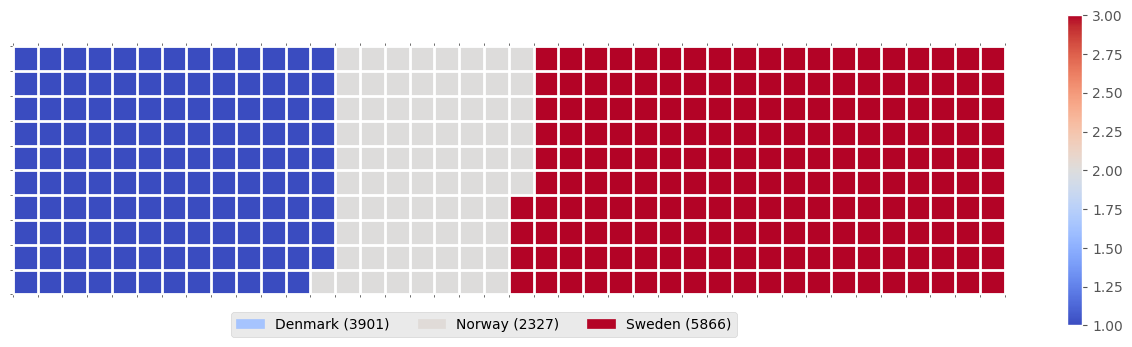

In [15]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

И вот, пожалуйста! Какая красивая * вкусная* `вафельная" таблица, вам не кажется


Теперь было бы очень неэффективно повторять эти семь шагов каждый раз, когда мы хотим создать "вафельную` диаграмму. Итак, давайте объединим все семь шагов в одну функцию под названием *create_waffle_chart*. Эта функция принимала бы в качестве входных данных следующие параметры:

> 1. **categories**: уникальные категории или классы во фрейме данных.
> 2. **values**: значения, соответствующие категориям или классам.
> 3. **height**: Заданная высота вафельной диаграммы
> 4. **width**: Заданная ширина вафельной диаграммы.
> 5. **colormap**: kласс цветовой карты
> 6. **value_sign**: тобы сделать нашу функцию более обобщаемой, мы добавим этот параметр для обозначения знаков, которые могут быть связаны со значением, таким как %, $ и так далее. **value_sign** имеет значение по умолчанию - пустая строка.

In [17]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)

    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))

    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1

            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index

    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'

        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

Теперь, чтобы создать "вафельную" диаграмму, все, что нам нужно сделать, это вызвать функцию "create_waffle_chart". Давайте определим входные параметры:


In [20]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

А теперь давайте вызовем нашу функцию для создания `вафельной` диаграммы.


Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

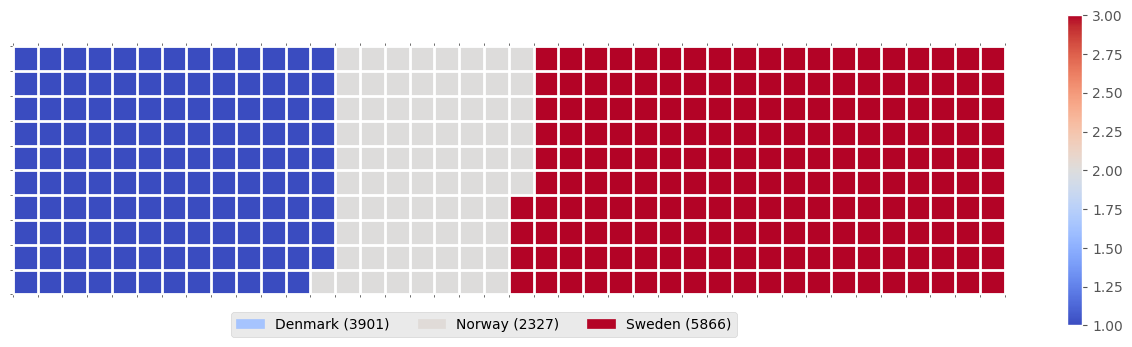

In [21]:
create_waffle_chart(categories, values, height, width, colormap)

Кажется, появился новый пакет Python для создания "вафельных диаграмм" под названием [PyWaffle](https://github.com/ligyxy/PyWaffle ), но похоже, что репозиторий все еще создается. Но не стесняйтесь проверить это и поиграть с этим.


# Облака слов <a id="8"></a>


Облака "слов" (также известные как текстовые облака или облака тегов) работают простым образом: чем чаще конкретное слово появляется в источнике текстовых данных (например, в речи, сообщении в блоге или базе данных), тем больше и жирнее оно отображается в облаке слов.


К счастью, в Python уже существует пакет Python для создания облаков `word`. Пакет под названием `word_cloud` был разработан **Андреасом Мюллером**. Вы можете узнать больше о пакете, перейдя по этой [ссылке](https://github.com/amueller/word_cloud /).

Давайте воспользуемся этим пакетом, чтобы узнать, как сгенерировать облако word для данного текстового документа.

Сначала давайте установим пакет.

In [22]:
# install wordcloud
!pip3 install wordcloud==1.8.1

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp310-cp310-linux_x86_64.whl size=441155 sha256=c3181fbffb3adceadb62b3cceb8a81e898124f482f7084f474c4c711cf667e9a
  Stored in directory: /root/.cache/pip/wheels/6b/b1/75/024072f28a2b9d6c4f80b35ebfd6ced7fd9fc58e9f1b933b9f
Successfully built wordcloud
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2
Wordcloud is installed and imported!


Облака "Word" обычно используются для выполнения высокоуровневого анализа и визуализации текстовых данных. Соответственно, давайте отвлечемся от набора данных об иммиграции и поработаем с примером, который включает анализ текстовых данных. Давайте попробуем проанализировать короткий роман, написанный Льюисом Кэрроллом под названием "Приключения Алисы в стране чудес". Давайте продолжим и загрузим _.txt_ файл романа.


In [23]:
import urllib

# open the file and read it into a variable alice_novel
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

Далее, давайте используем стоп-слова, которые мы импортировали из `word_cloud`. Мы используем функцию *set*, чтобы удалить все лишние стоп-слова.


In [24]:
stopwords = set(STOPWORDS)

Создайте объект word cloud и сгенерируйте облако word. Для простоты давайте сгенерируем облако слов, используя только первые 2000 слов в романе.


In [26]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

Awesome! Now that the `word` cloud is created, let's visualize it.


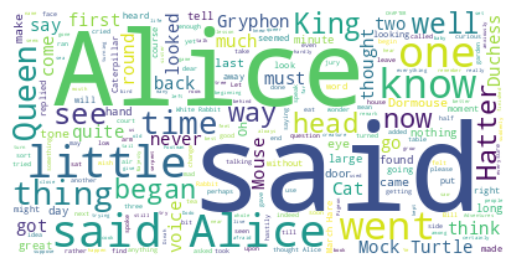

In [27]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Интересно! Итак, в первых 2000 словах романа наиболее распространенными являются **Алиса**, **саид**, **малышка**, **Королева** и так далее. Давайте изменим размер облака так, чтобы мы могли немного лучше видеть менее частые слова.


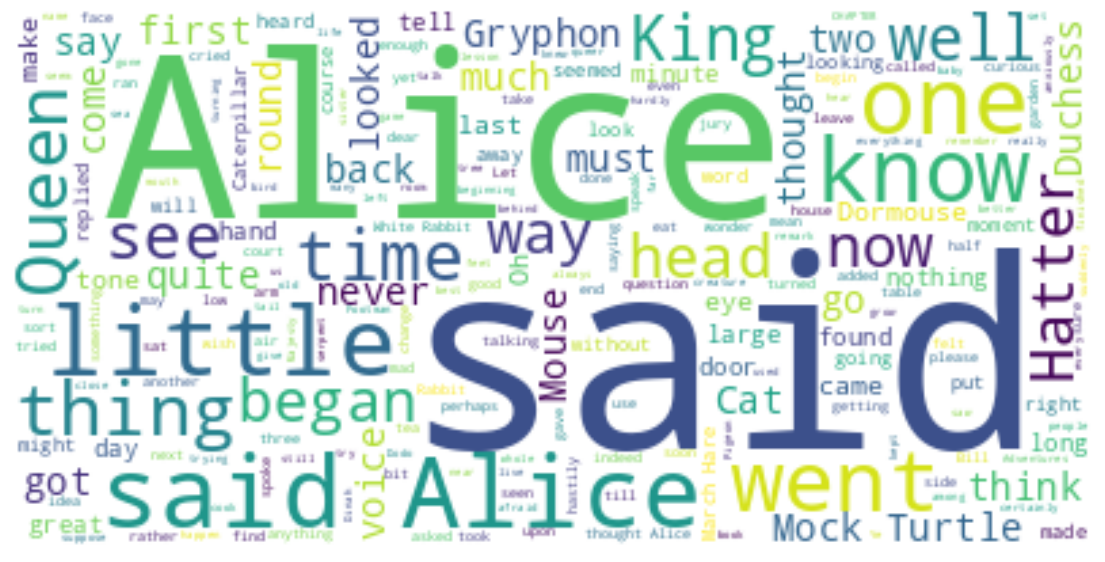

In [28]:
fig = plt.figure(figsize=(14, 18))

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Намного лучше! Однако **сказал** на самом деле не является информативным словом. Итак, давайте добавим это к нашим стоп-словам и восстановим облако.

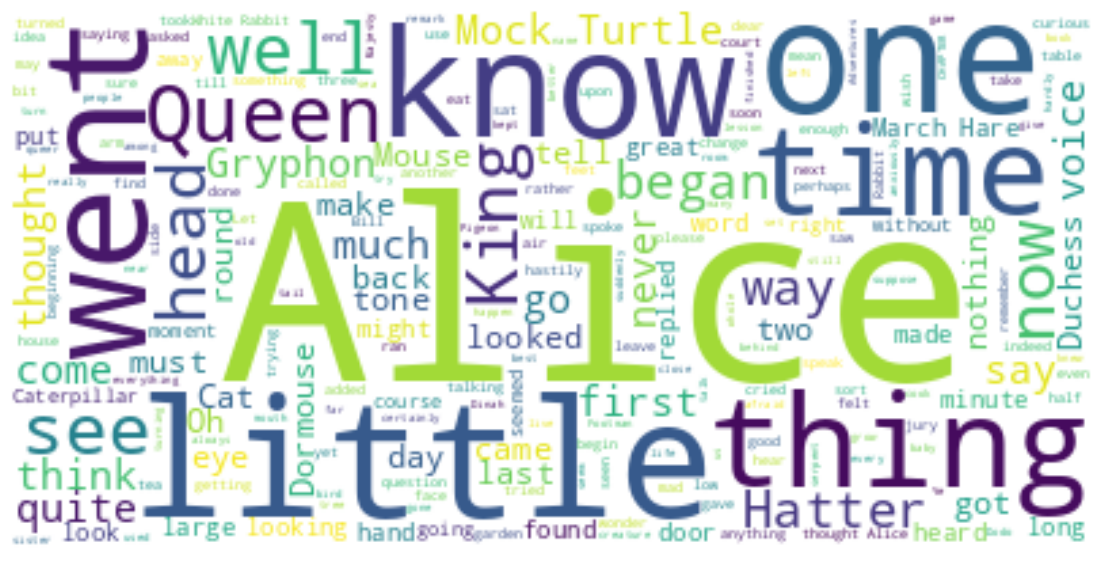

In [29]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Превосходно! Это выглядит действительно интересно! Еще одна интересная вещь, которую вы можете реализовать с помощью пакета word_cloud, - это наложение слов на маску любой формы. Давайте используем маску Алисы и ее кролика. Мы уже создали маску для вас, так что давайте продолжим и загрузим ее и назовем *alice_mask.png*.

In [30]:
# save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

Давайте взглянем на то, как выглядит маска.


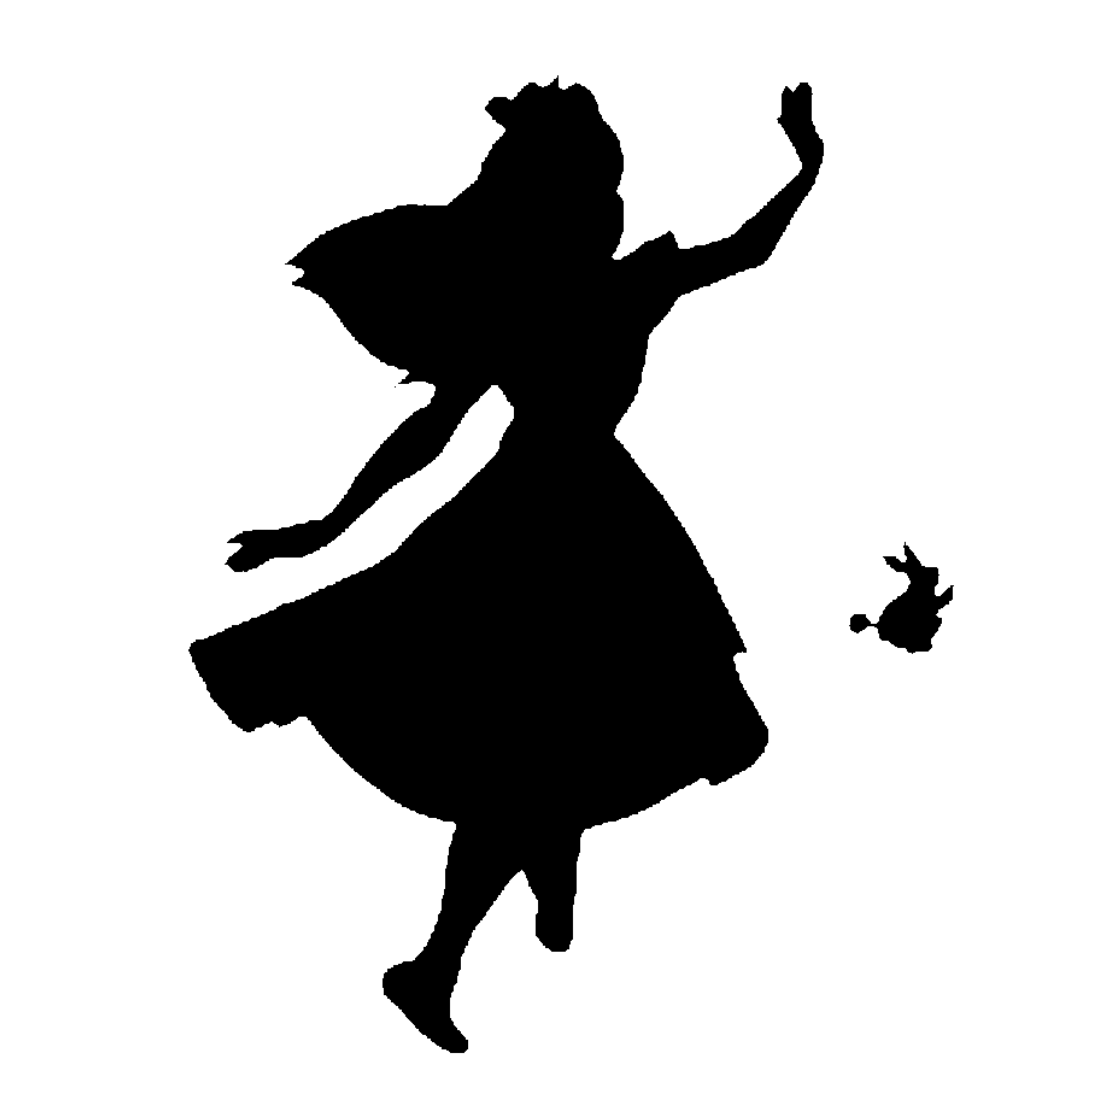

In [31]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Сформировать облако "word" в соответствии с маской несложно с помощью пакета "word_cloud". Для простоты мы продолжим использовать первые 2000 слов в романе.


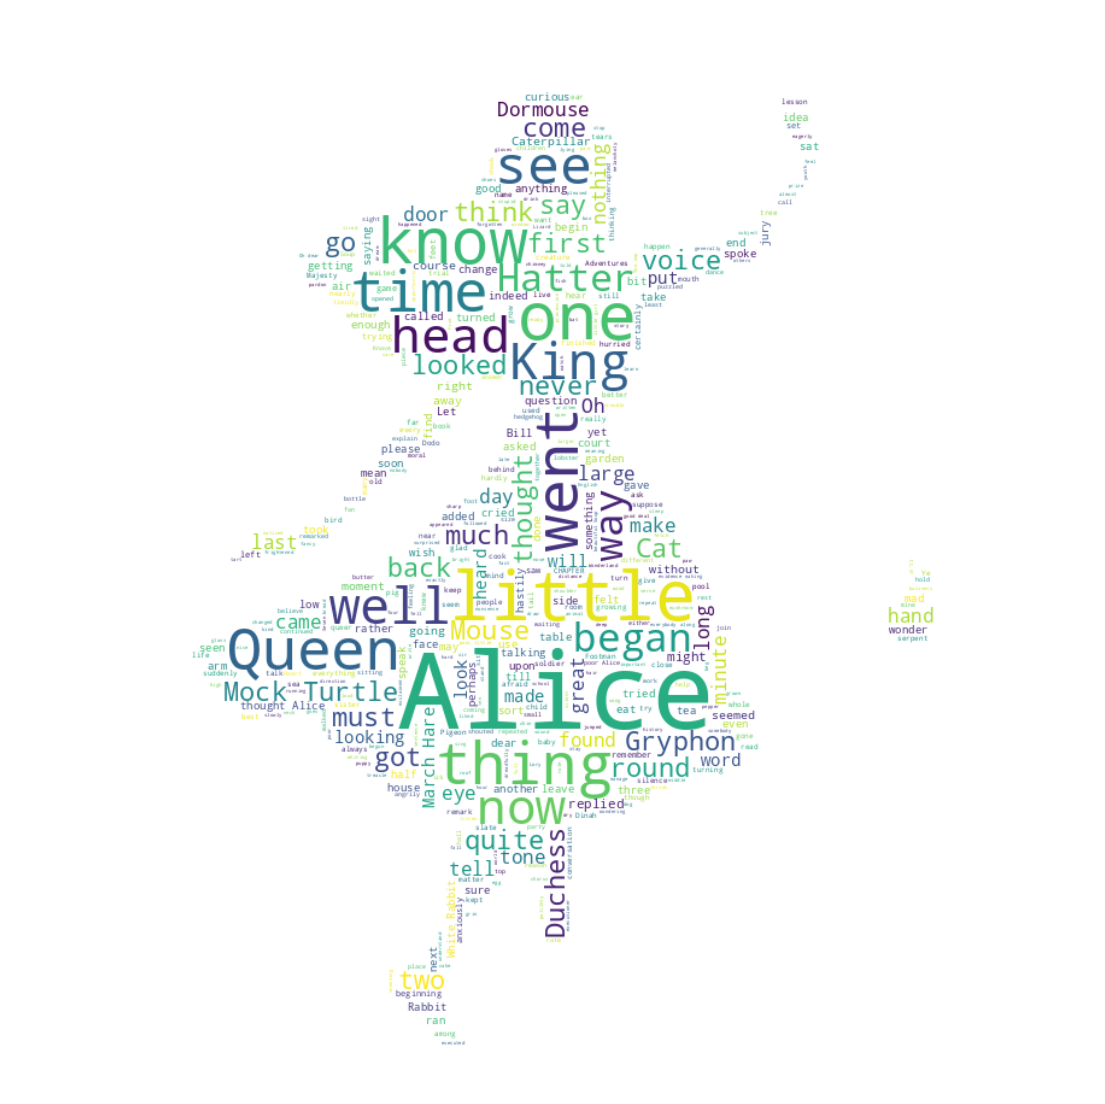

In [32]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Действительно впечатляет!


К сожалению, в наших иммиграционных данных нет текстовых данных, но там, где есть желание, есть и способ. Давайте сгенерируем образец текстовых данных из нашего набора иммиграционных данных, скажем, текстовые данные из 90 слов.


Давайте вспомним, как выглядят наши данные.

In [33]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


И каков был общий объем иммиграции с 1980 по 2013 год?


In [34]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

Используя страны с названиями из одного слова, давайте продублируем название каждой страны в зависимости от того, какой вклад они вносят в общую иммиграцию.


In [35]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times = int(df_can.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

Здесь мы не имеем дело ни с какими стоп-словами, поэтому нет необходимости передавать их при создании облака слов.


In [36]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


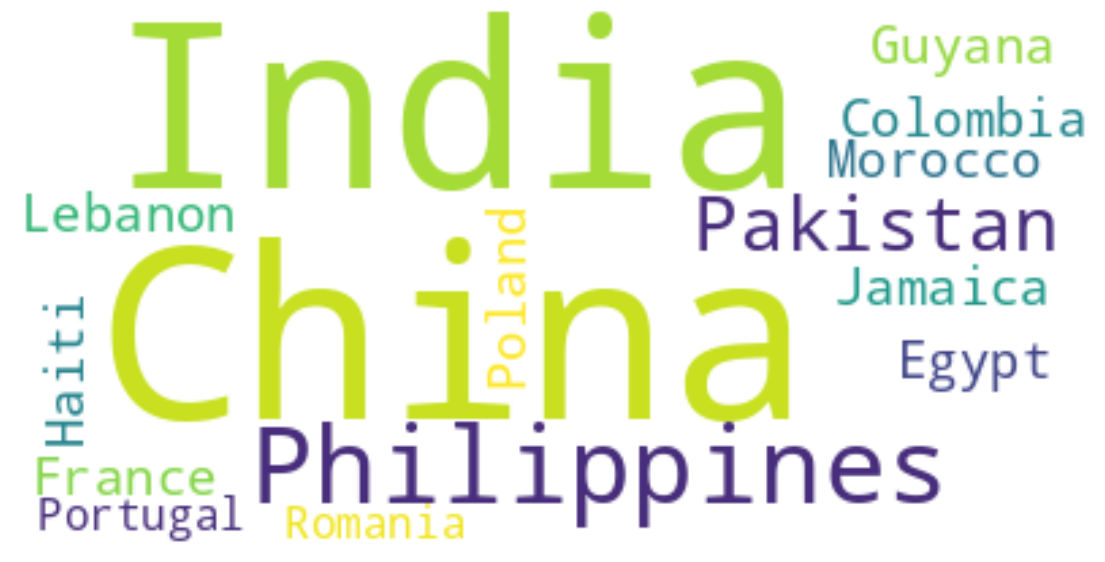

In [37]:
# display the cloud
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Согласно приведенному выше слову cloud, похоже, что большинство иммигрировавших людей прибыли из одной из 15 стран, которые отображаются словом cloud. Один классный визуальный эффект, который вы могли бы создать, - это, возможно, использование карты Канады и маски и наложение слова cloud поверх карты Канады. Это был бы интересный визуальный эффект для создания!


# Regression Plots <a id="10"></a>


> Seaborn - это библиотека визуализации Python, основанная на matplotlib. Он предоставляет высокоуровневый интерфейс для рисования привлекательной статистической графики. Вы можете узнать больше о *seaborn*, перейдя по этой ссылке [link](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01 ) и подробнее о графиках регрессии *seaborn*, следуя этому [link](http://seaborn.pydata.org/generated/seaborn.regplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01).


В лабораторной работе *Круговые диаграммы, прямоугольные графики, точечные графики и пузырьковые графики* мы узнали, как создать точечную диаграмму, а затем подогнать линию регрессии. Потребовалось ~ 20 строк кода, чтобы создать точечную диаграмму вместе с регрессионной подгонкой. В этом заключительном разделе мы рассмотрим *seaborn* и посмотрим, насколько эффективно создавать линии регрессии и подгонки с помощью этой библиотеки!


Let's first install *seaborn*


In [38]:
# install seaborn
# !pip3 install seaborn

# import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


Создайте новый фрейм данных, в котором будет храниться общее число иммигрантов, прибывших в Канаду за год с 1980 по 2013 год.


In [39]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


С помощью *seaborn* создать график регрессии так же просто, как вызвать функцию **regplot**.


<Axes: xlabel='year', ylabel='total'>

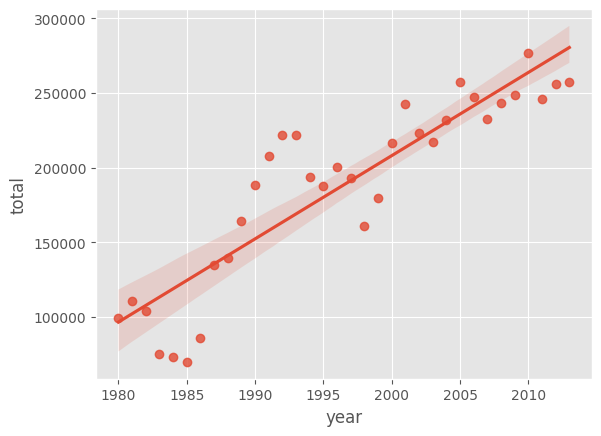

In [40]:
sns.regplot(x='year', y='total', data=df_tot)

Это не волшебство, это "рожденный в море"! Вы также можете настроить цвет точечной диаграммы и линии регрессии. Давайте изменим цвет на зеленый.


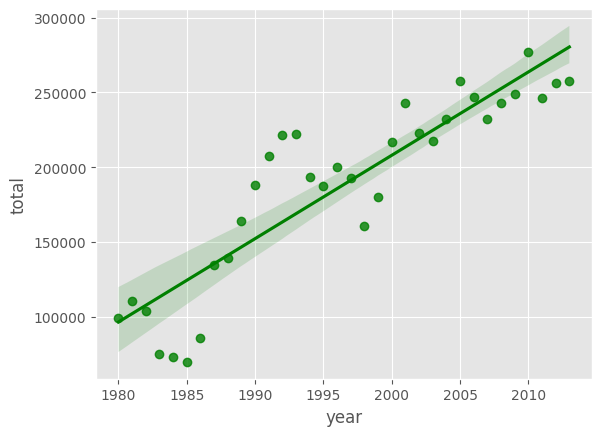

In [42]:
sns.regplot(x='year', y='total', data=df_tot, color='green')
plt.show()

Вы всегда можете настроить форму маркера, поэтому вместо круглых маркеров давайте использовать `+`.


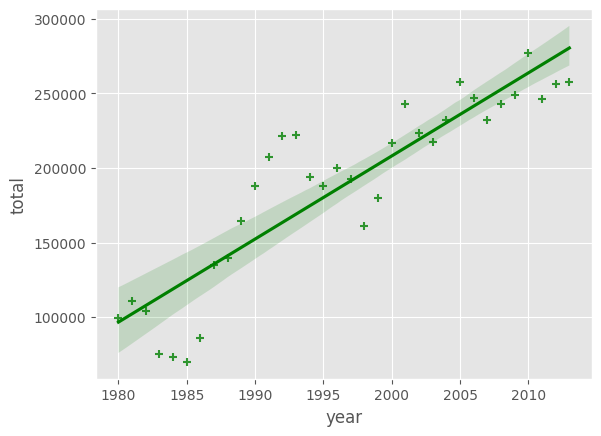

In [43]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

Давайте немного расширим сюжет, чтобы он был более привлекательным для глаз.


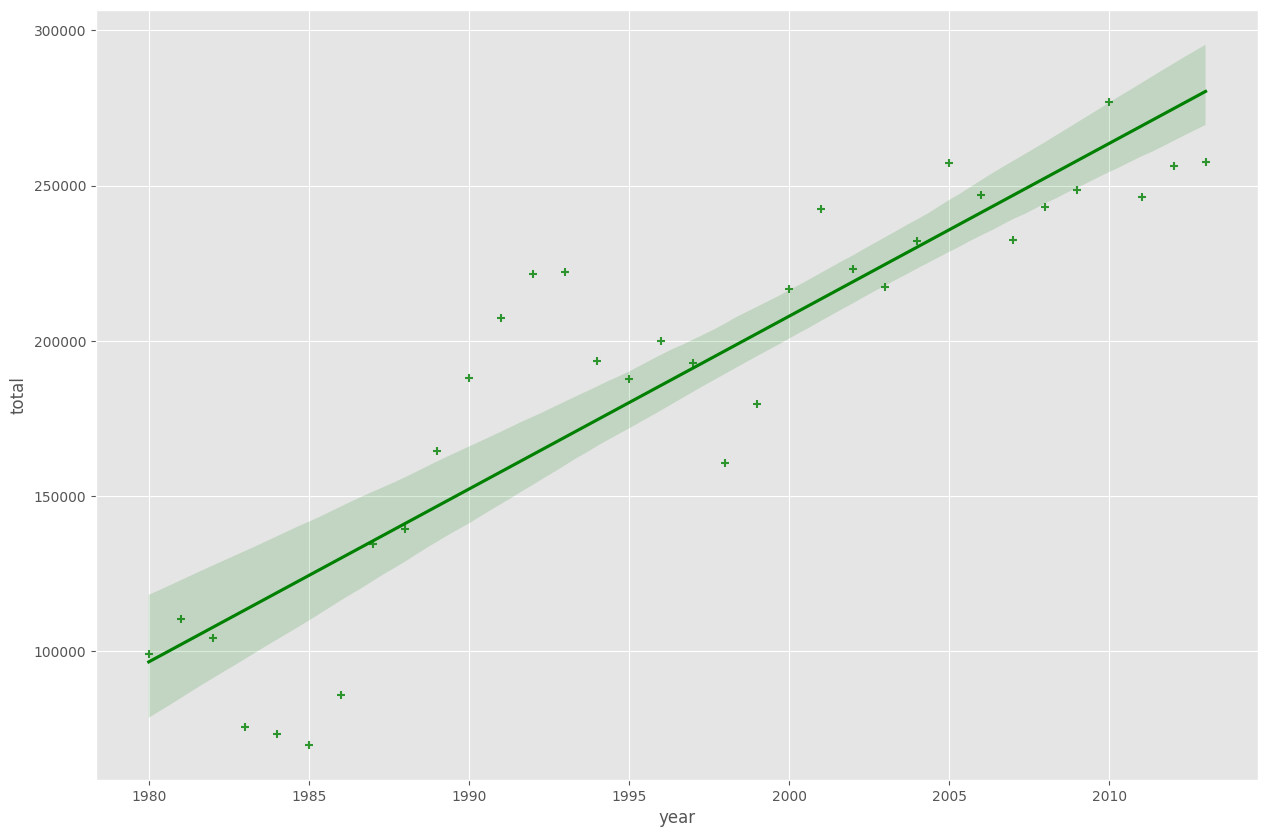

In [44]:
plt.figure(figsize=(15, 10))
sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

И давайте увеличим размер маркеров, чтобы они соответствовали новому размеру рисунка, и добавим заголовок и x- и y-метки.


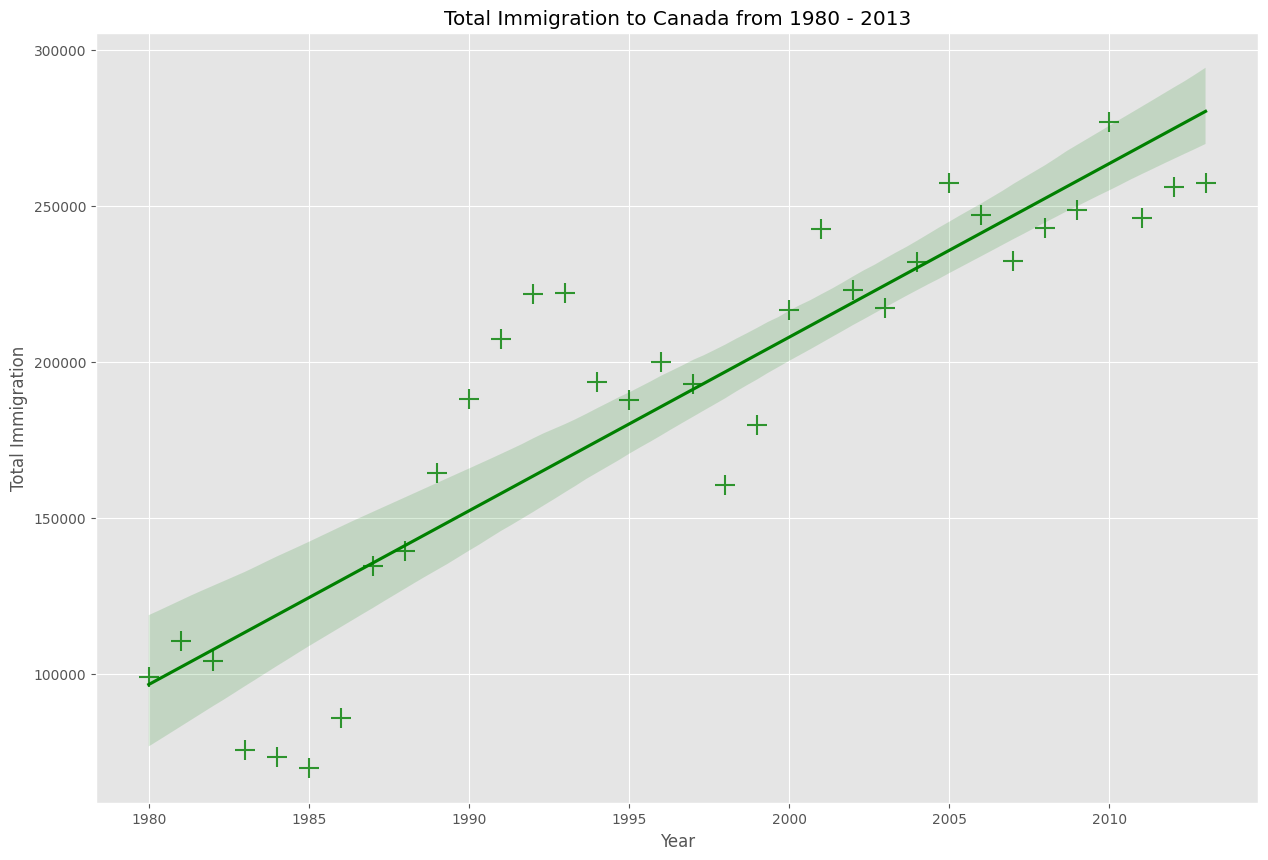

In [45]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title
plt.show()

И, наконец, увеличьте размер шрифта меток с галочками, заголовка и меток x и y, чтобы они не казались обделенными вниманием!

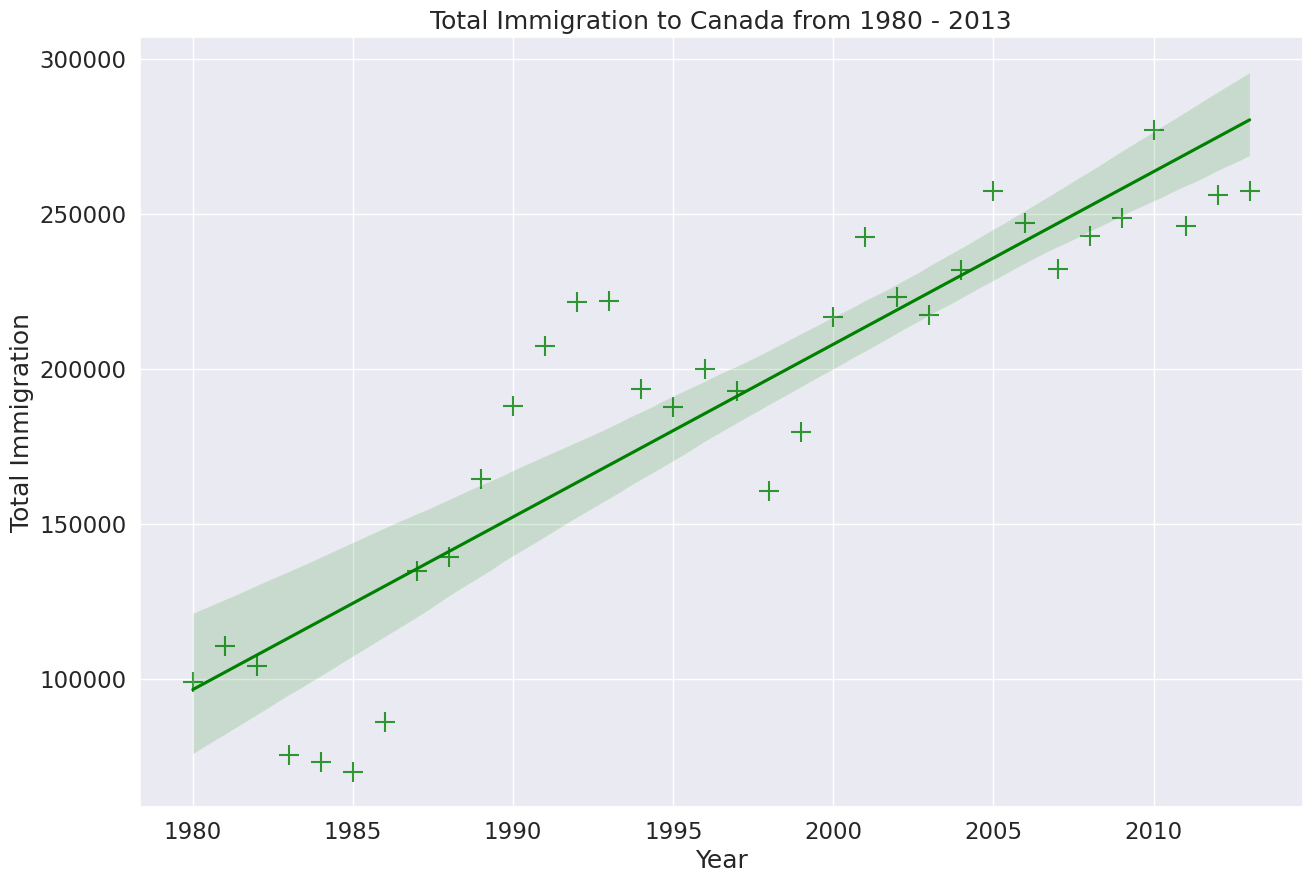

In [46]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

Удивительно! Полная точечная диаграмма с регрессионным соответствием, содержащая всего 5 строк кода. Разве это не удивительно?


Если вы не большой поклонник фиолетового фона, вы можете легко изменить стиль на белый однотонный фон.


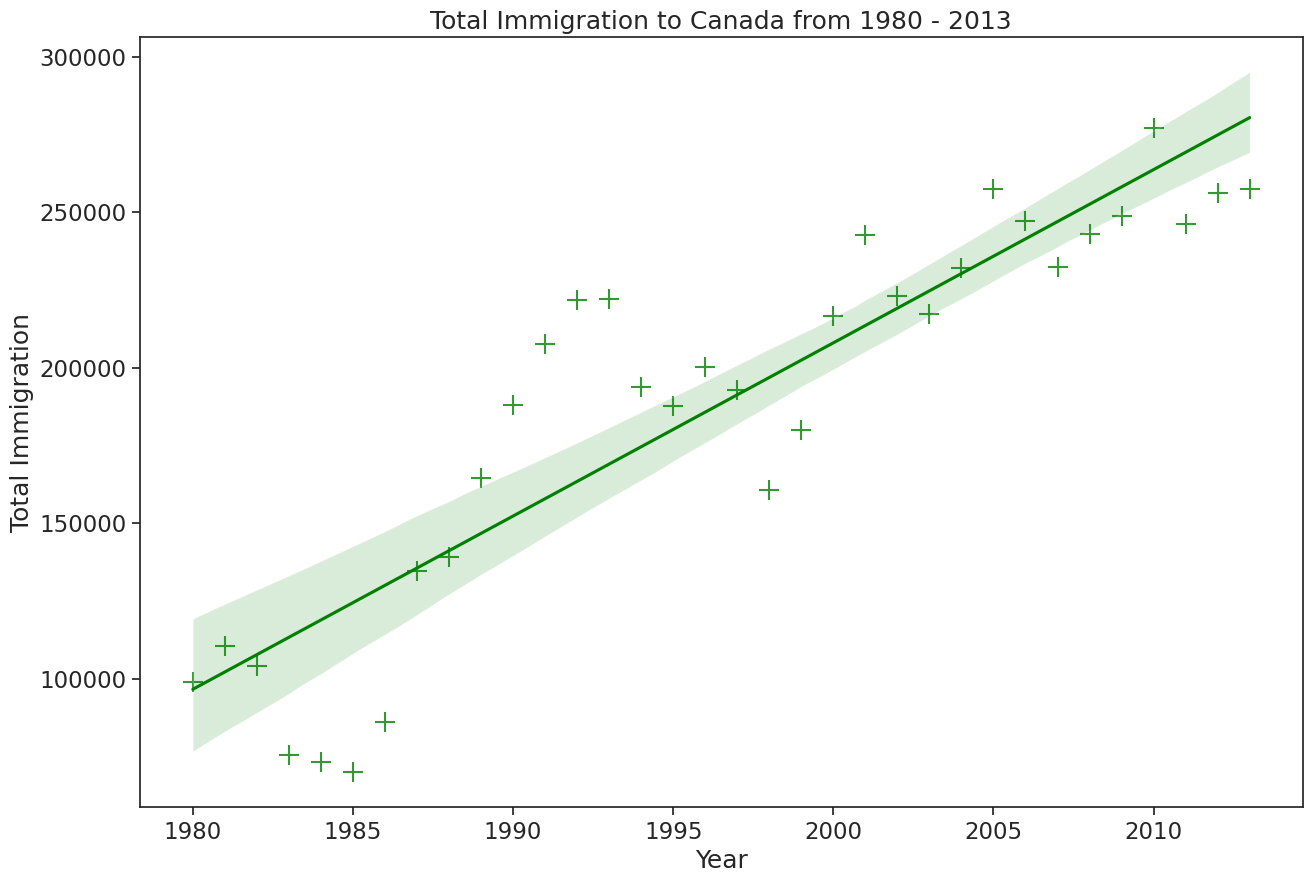

In [47]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')  # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

Or to a white background with gridlines.


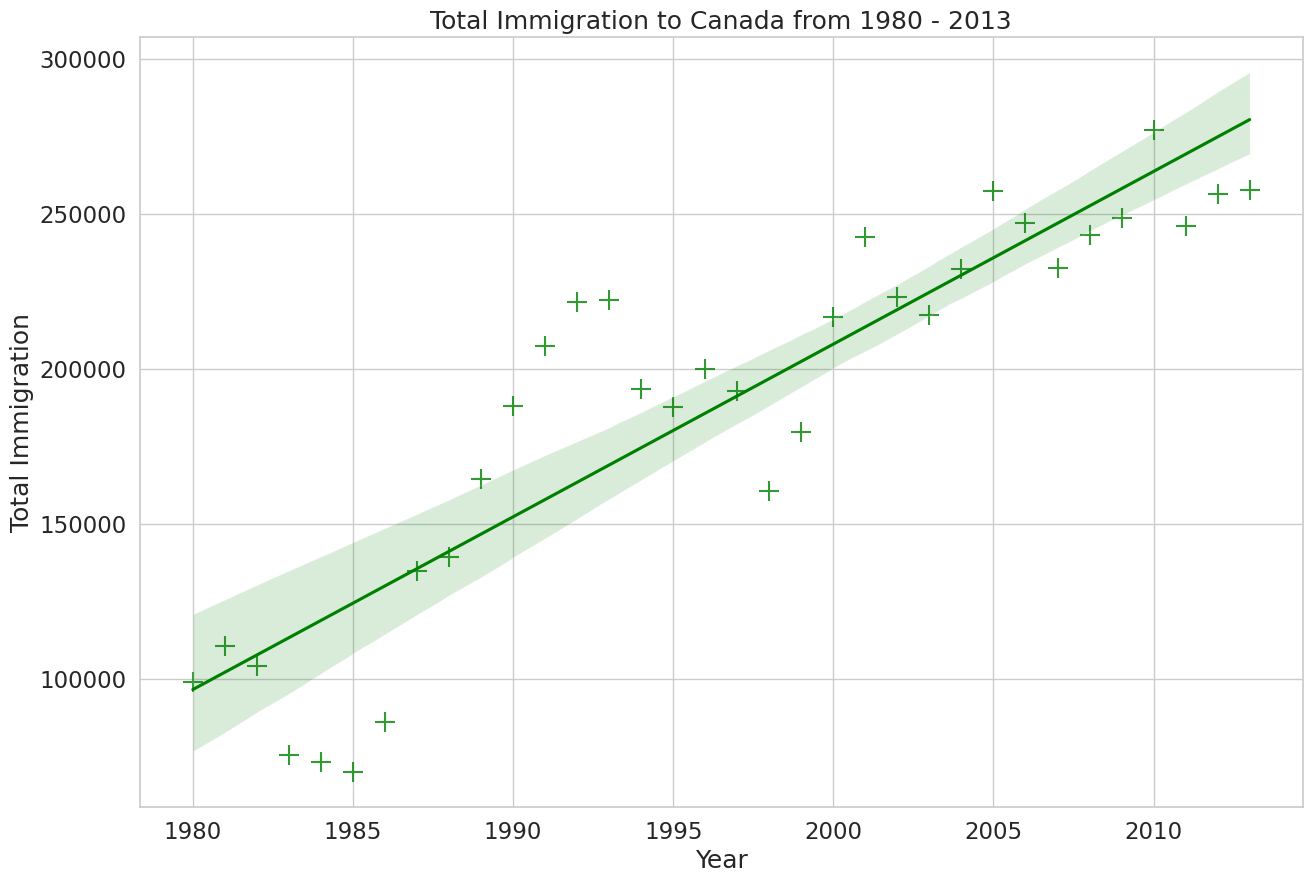

In [48]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

** Вопрос **: Используйте seaborn для создания точечной диаграммы с линией регрессии, чтобы визуализировать общую иммиграцию из Дании, Швеции и Норвегии в Канаду с 1980 по 2013 год.

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

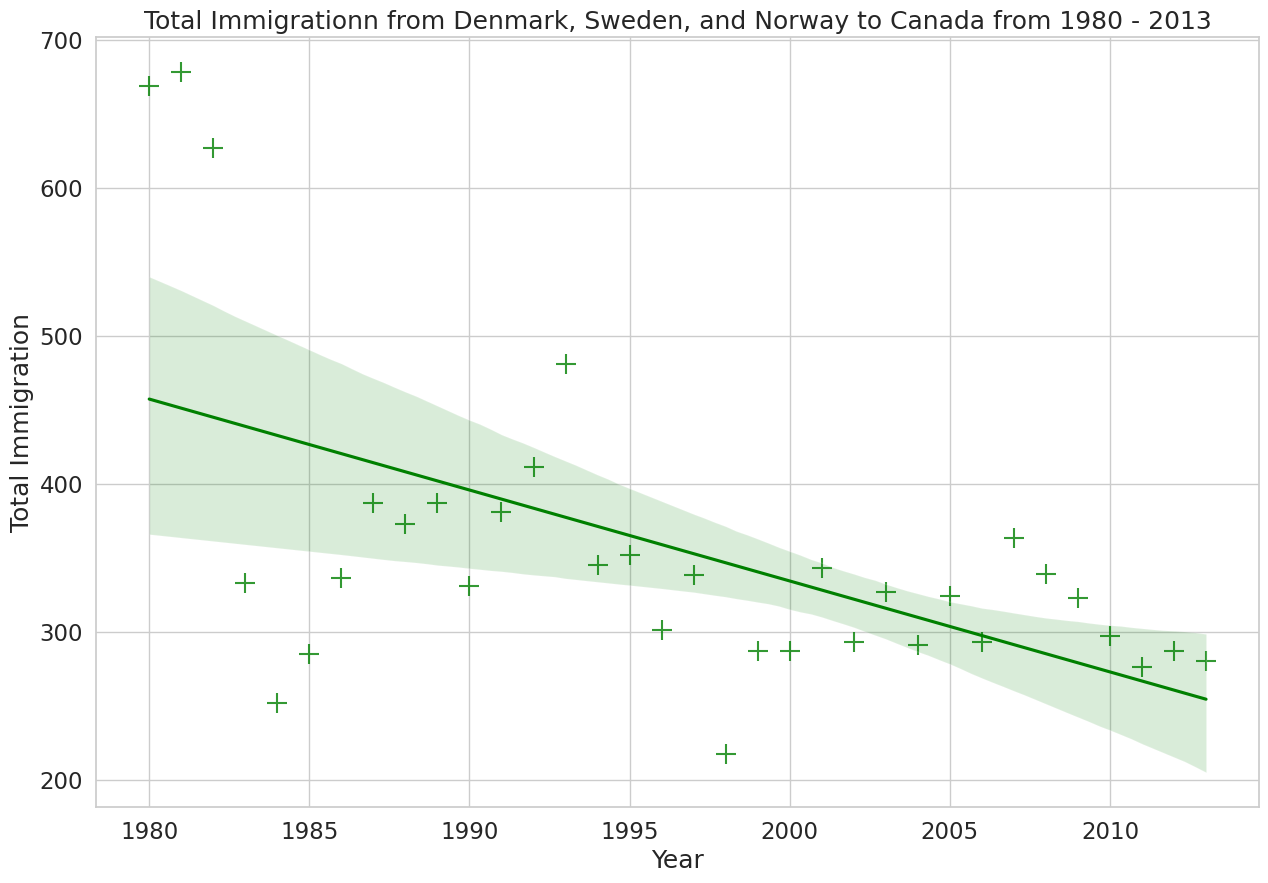

In [67]:
### type your answer here


# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# создайте df_total путем суммирования по трем странам за каждый год
df_total = pd.DataFrame(df_countries.sum(axis=1))


# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# определите размер фигуры
plt.figure(figsize=(15, 10))

# определите стиль фона и размер шрифта

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# создайте график и добавьте метки заго

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')






<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    
    # create df_countries dataframe
    df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

    # create df_total by summing across three countries for each year
    df_total = pd.DataFrame(df_countries.sum(axis=1))

    # reset index in place
    df_total.reset_index(inplace=True)

    # rename columns
    df_total.columns = ['year', 'total']

    # change column year from string to int to create scatter plot
    df_total['year'] = df_total['year'].astype(int)

    # define figure size
    plt.figure(figsize=(15, 10))

    # define background style and font size
    sns.set(font_scale=1.5)
    sns.set_style('whitegrid')

    # generate plot and add title and axes labels
    ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
    ax.set(xlabel='Year', ylabel='Total Immigration')
    ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

```

</details>


### Thank you for completing this lab!


## Author

<a href="https://www.linkedin.com/in/aklson/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01">Alex Aklson</a>



## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2021-05-19  | 2.3  | Weiqing Wang  | Fixed typos and code smells |
| 2021-01-21  | 2.2  | Lakshmi Holla | Updated TOC markdown cell|
| 2020-11-03  | 2.1  | Lakshmi Holla | Changed URL of excel file |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
